In [26]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [27]:
#read the csv file
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [28]:
#columns
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Checking for null values

In [29]:
df[df.isna().any(axis=1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10,1736800520,20150403T000000,662500.0,3,2.5,3560,9796,1.0,0,0,...,8,NaN,1700,1965,0,98007,47.6007,-122.145,2210,8925
17,6865200140,20140529T000000,485000.0,4,1.0,1600,4300,1.5,0,0,...,7,NaN,0,1916,0,98103,47.6648,-122.343,1610,4300


In [30]:
#replacing the null values
#as observed from other rows, sqft_above  = sqft_living - sqft_basement
df['sqft_above'] = df.apply(
    lambda row: row['sqft_living'] - row['sqft_basement'] if np.isnan(row['sqft_above']) else row['sqft_above'],
    axis=1
)

### Column types

price - target variable
date - continuous

numerical - bedrooms - bathrooms - sqft_living - sqft_lot, floors, view, sqft_above, sqft_basement, yr_built(age of the building), yr_renovated,, sqft_living15, sqft_lot15

ordinal - condition - grade,

categorical- waterfront (0 and 1),  zipcode,

interval scale - lat and long

## Data splitting

In [31]:
X = df.drop('price',axis=1)
y = df.price
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
X_train , X_valid, y_train, y_valid = train_test_split(X_train , y_train, test_size=0.25)
print(len(X_train),len(X_valid),len(X_test))

12967 4323 4323


## EDA

## Questions:

### univariate:

* date - In which month and year most number of houses where sold?
* bedrooms - Are there any outliers in the number of bedrooms? What is the average number of bedrooms in the dataset?
* bathrooms - Are there houses with no bathrooms? IS the observation correct for these? 
* sqft living - What is the maximum sqft living space. In what range 75% of the sqft values are in?
* water front - what proportion of houses have water front in the observartions?
* floor - No of floors most common in the dataset
* basement - no of houses with a basement
* year - what is the maximum and minimum ages of the houses
* zipcode - which zipcode is most common in the dataset
* renovated - proportion of houses that are renovated

### bivariate:
* year - price. Is age affecting the price of the houses
* is renovating the house improving the house price?
* is condition and age correlated
* is price heavily dependent on grade
* is zipcode affecting the price of the house
* is latitude and longitude required with the zipcode
* is the house renovated factor contributiong to price
* is sqft living and sqft lot correlated
* is the price higher for houses with water front
* is the price higher for houses with view
* is number of floors contributing to price of the house
* is no of bathrooms correlated with no of bathrooms
* does houses with waterfront have non zero no of views

In [32]:
X_train.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.296700e+04,12967.000000,12967.000000,12967.000000,1.296700e+04,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000
mean,4.549226e+09,3.364849,2.114387,2083.103416,1.506514e+04,1.497764,0.007712,0.237835,3.412200,7.662374,1791.556412,291.547004,1971.109586,83.286651,98077.902907,47.559468,-122.214121,1989.849387,12877.539215
std,2.879712e+09,0.940334,0.769955,917.855312,4.084790e+04,0.541679,0.087481,0.767742,0.648911,1.184502,826.142402,441.908141,29.265276,399.183291,53.638388,0.139208,0.140584,691.919018,26876.539750
min,1.200019e+06,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.515000,399.000000,651.000000
25%,2.110950e+09,3.000000,1.500000,1421.000000,5.059000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.470450,-122.328000,1480.000000,5100.000000
50%,3.901100e+09,3.000000,2.250000,1920.000000,7.650000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.570900,-122.229000,1840.000000,7635.000000
75%,7.304300e+09,4.000000,2.500000,2550.000000,1.058750e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1997.000000,0.000000,98118.000000,47.677750,-122.126000,2370.000000,10078.500000
max,9.895000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6110.000000,560617.000000


### Adding new features

In [33]:
#New Varaibles
#1) Age of the house

def adding_features(df):
    df['age'] = 2022 -  df['yr_built']
    df['have_basement'] = np.where((df['sqft_basement'] > 0 ), 1, 0)
    
adding_features(X_train)

### Univariate analysis

------------ AGE ------------------


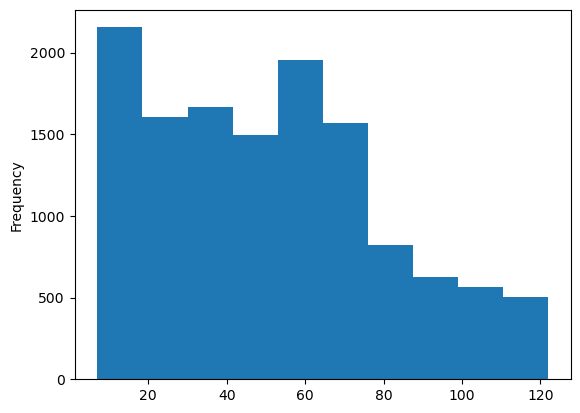

------------ BEDROOMS ------------------


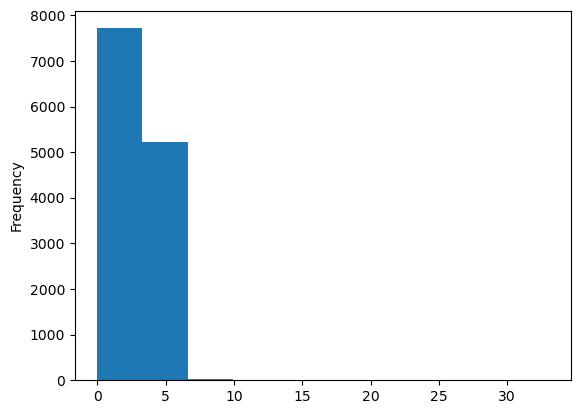

------------ BATHROOMS ------------------


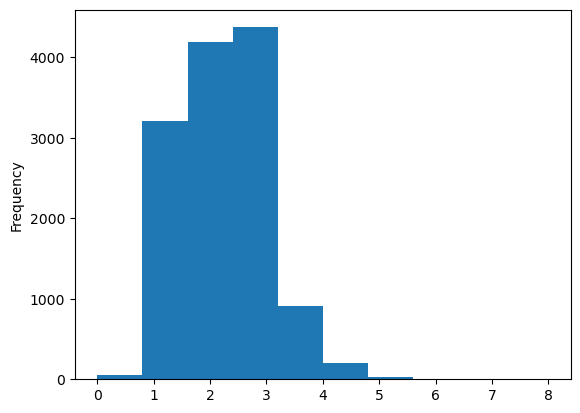

------------ SQFT_LIVING ------------------


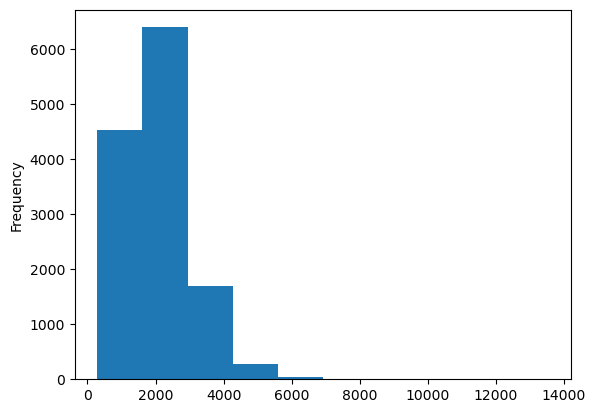

------------ SQFT_LOT ------------------


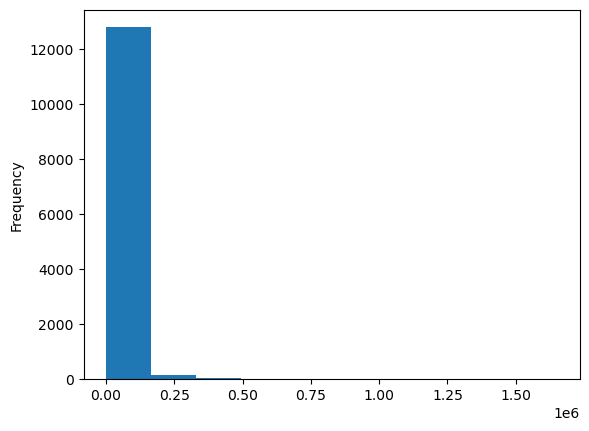

------------ FLOORS ------------------


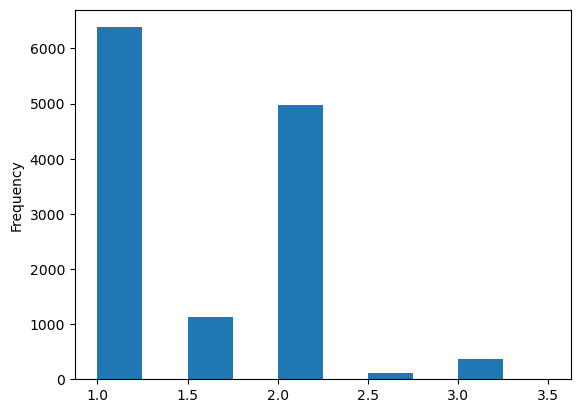

------------ SQFT_ABOVE ------------------


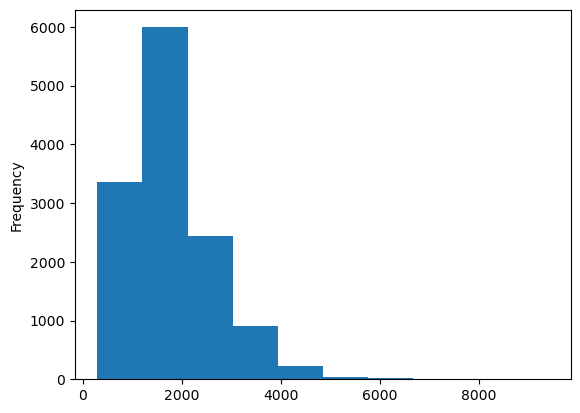

------------ SQFT_BASEMENT ------------------


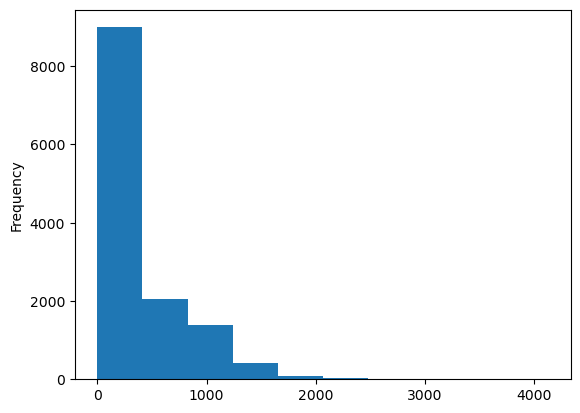

------------ YR_RENOVATED ------------------


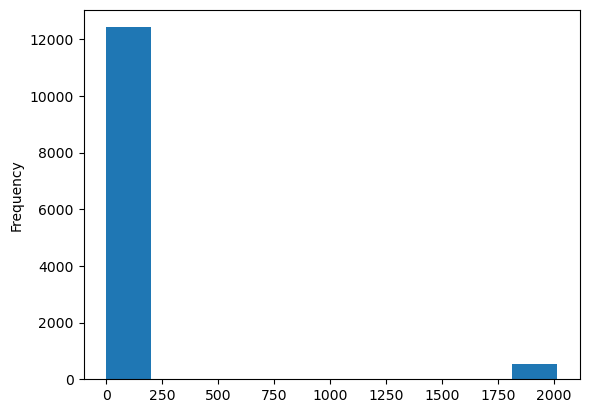

------------ SQFT_LIVING15 ------------------


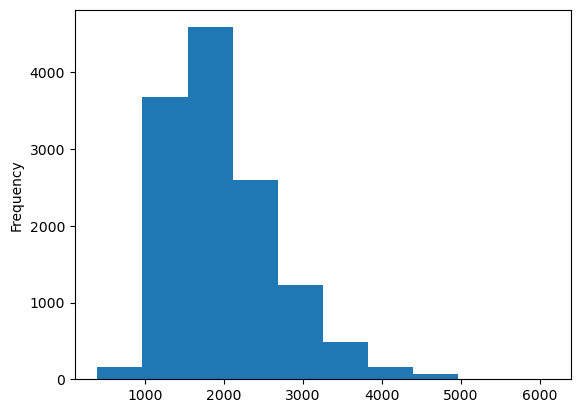

------------ SQFT_LOT15 ------------------


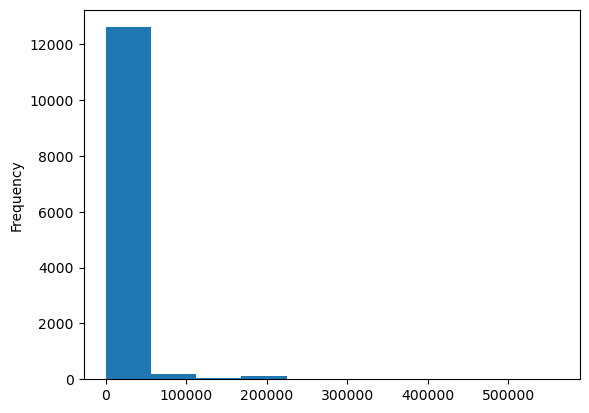

In [34]:
#histogram of numerical varaibles
numVar = ['age', 'bedrooms','bathrooms', 'sqft_living',
       'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement','yr_renovated', 
       'sqft_living15', 'sqft_lot15']

for var in numVar:
    print('------------',var.upper(),'------------------')
    X_train[var].plot.hist()
    plt.show()

------------ BEDROOMS ------------------


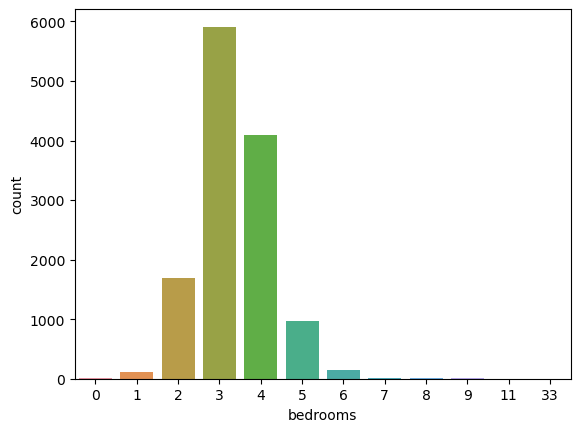

------------ VIEW ------------------


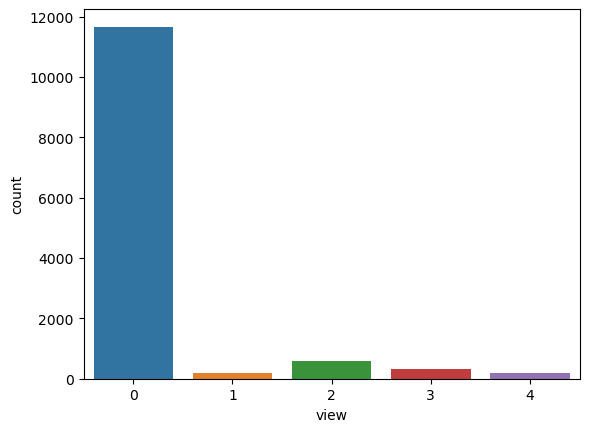

------------ CONDITION ------------------


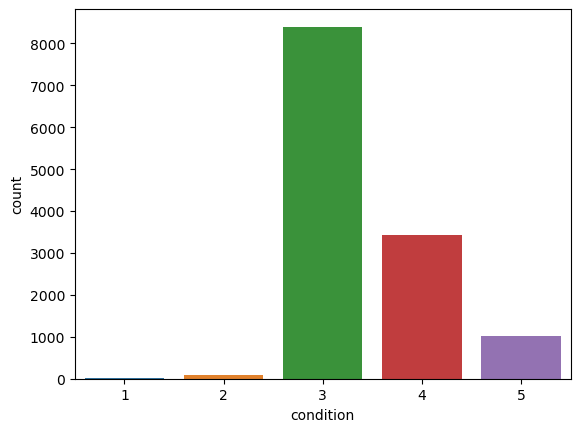

------------ GRADE ------------------


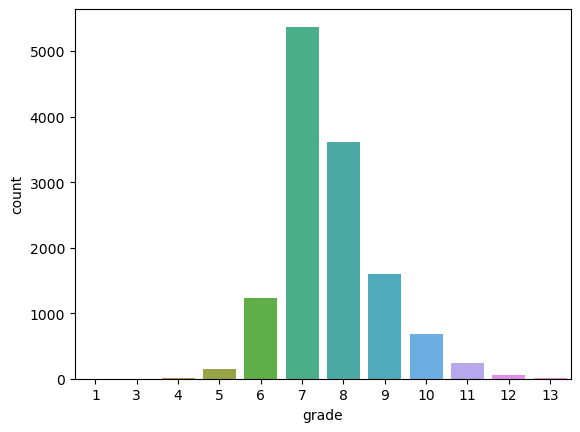

------------ WATERFRONT ------------------


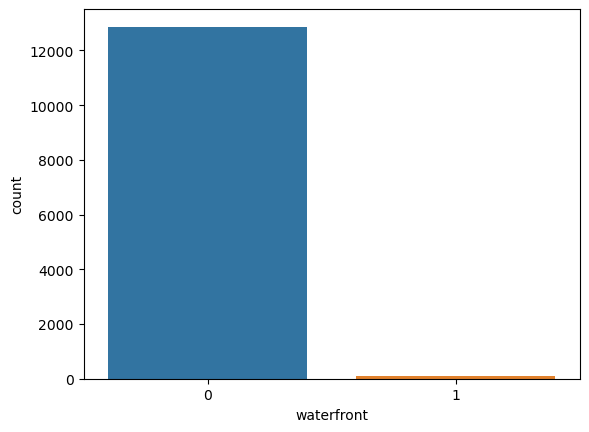

------------ ZIPCODE ------------------


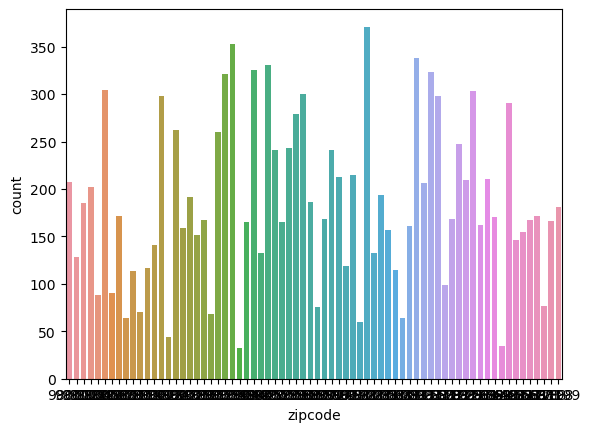

In [35]:
catgvars = ['bedrooms', 'view','condition', 'grade', 'waterfront','zipcode']

for var in catgvars:
    print('------------',var.upper(),'------------------')
    sb.countplot(x=X_train[var])
    plt.show()

### Bivariate analysis

In [36]:
# x = cont
# scatter plot, correlation coefficient
# if x is discrete/categorical group by agg summary
# side by side box plot
# which varaible do you think are impacting thr prices 
# are there any anomalies

### Scatter plot of numerical variables with price

------------ AGE ------------------


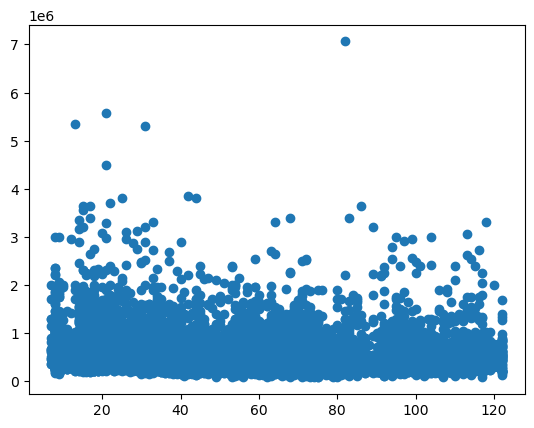

------------ BEDROOMS ------------------


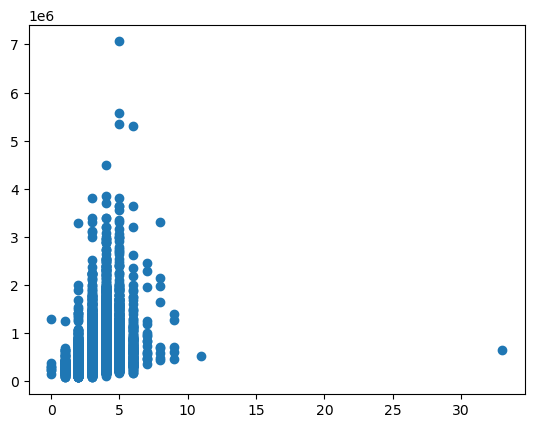

------------ BATHROOMS ------------------


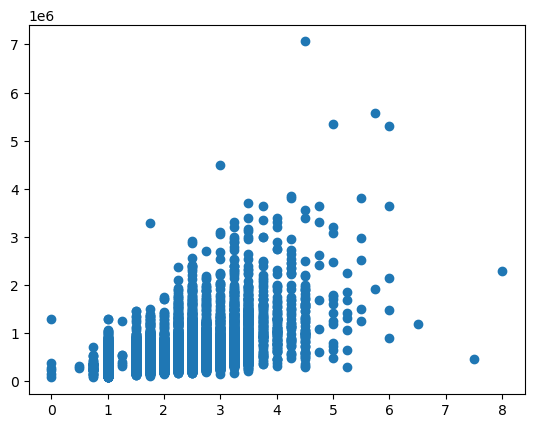

------------ SQFT_LIVING ------------------


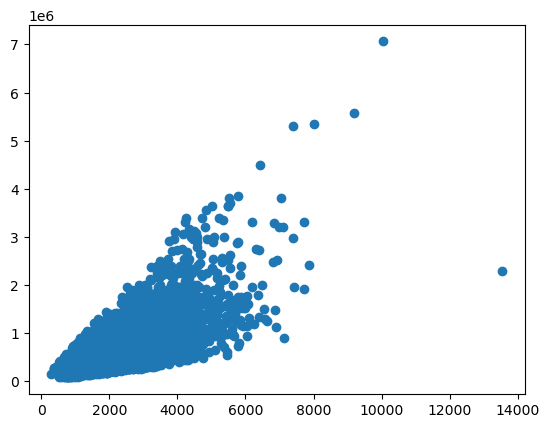

------------ SQFT_LOT ------------------


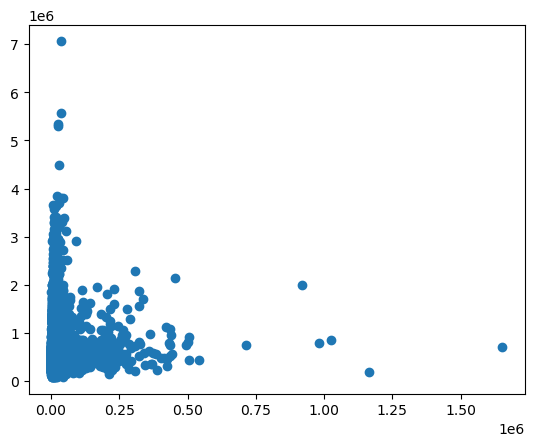

------------ FLOORS ------------------


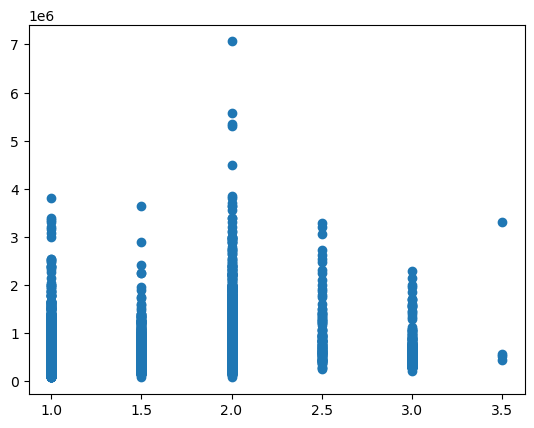

------------ SQFT_ABOVE ------------------


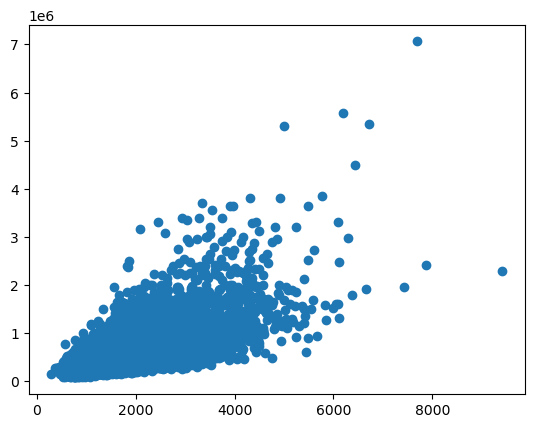

------------ SQFT_BASEMENT ------------------


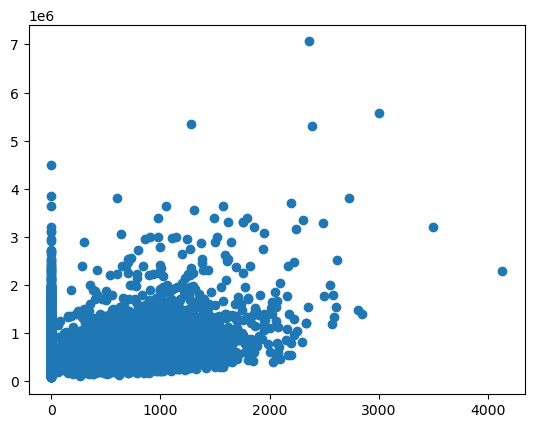

------------ YR_RENOVATED ------------------


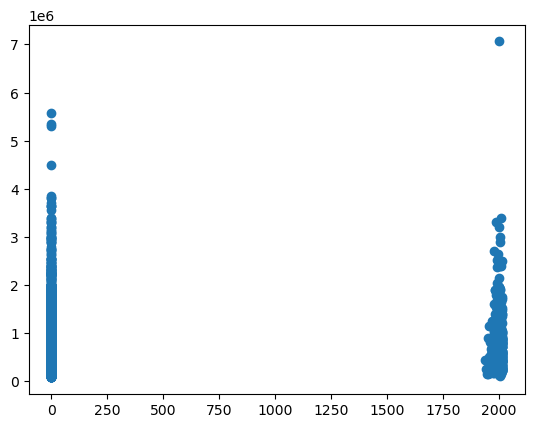

------------ SQFT_LIVING15 ------------------


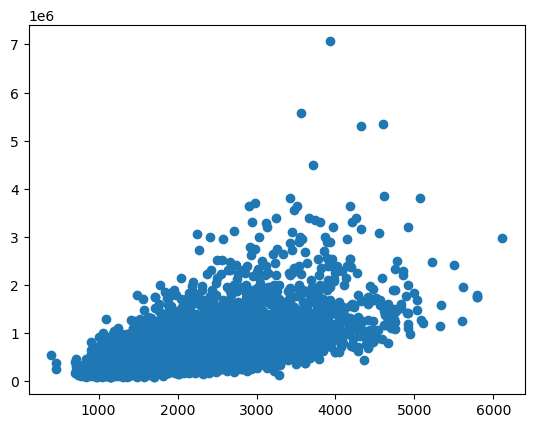

------------ SQFT_LOT15 ------------------


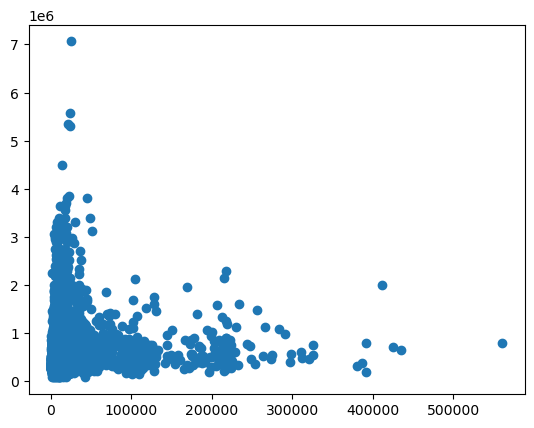

In [37]:
#scatter plot
for var in numVar:
    if var == 'price':
        continue
    print('------------',var.upper(),'------------------')
    plt.scatter(X_train[var], y_train)
    plt.show()

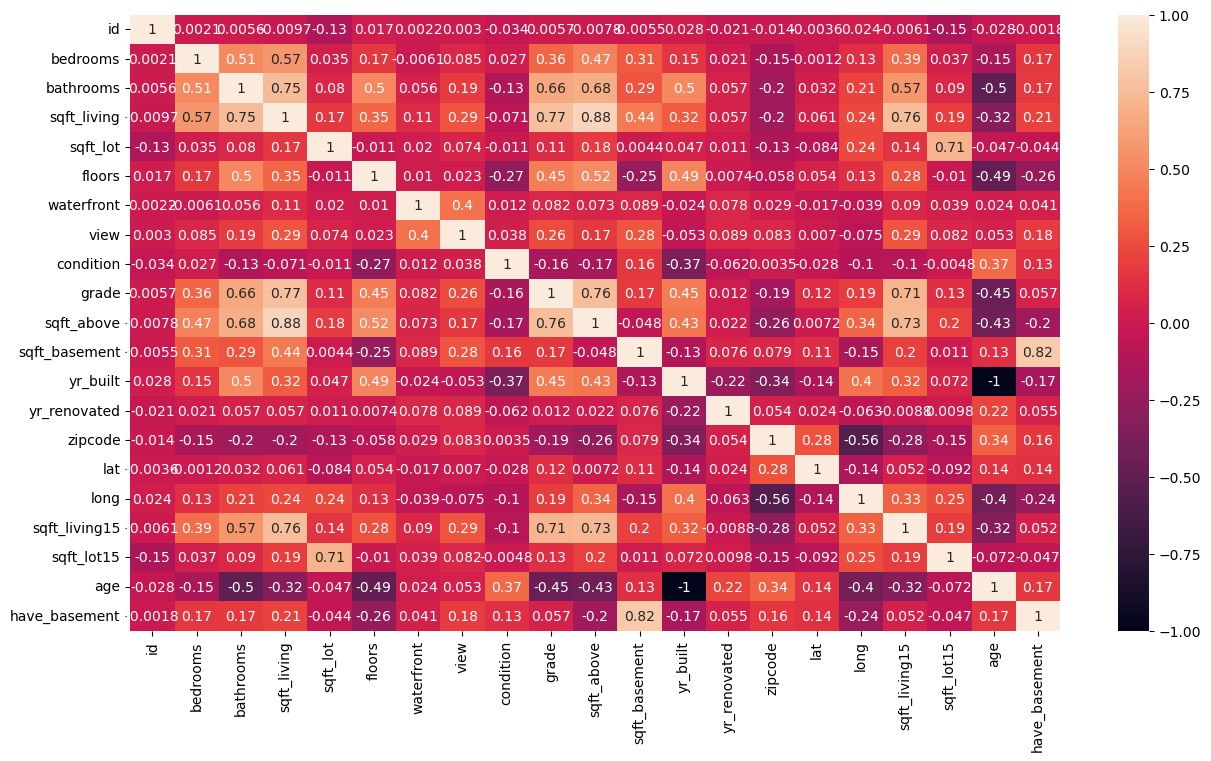

In [38]:
#heatmap

plt.figure(figsize=(15,8))
sb.heatmap(X_train.corr(), annot=True)
plt.show()

### Pearson's correlation coefficient

In [39]:
for var in numVar:
    if var == 'price':
        continue
    print('price correlation coefficient with',var,':',np.corrcoef(X_train[var],y_train)[0][1])

price correlation coefficient with age : -0.056534250572709104
price correlation coefficient with bedrooms : 0.31065173373514454
price correlation coefficient with bathrooms : 0.518219385114801
price correlation coefficient with sqft_living : 0.7013138446884976
price correlation coefficient with sqft_lot : 0.09195657430076039
price correlation coefficient with floors : 0.25520724134004136
price correlation coefficient with sqft_above : 0.6072375017657846
price correlation coefficient with sqft_basement : 0.32142424312777046
price correlation coefficient with yr_renovated : 0.12094885145251016
price correlation coefficient with sqft_living15 : 0.5923168727878696
price correlation coefficient with sqft_lot15 : 0.08959606756387332


### Side by side box plot for categorical variables

------------ BEDROOMS ------------------


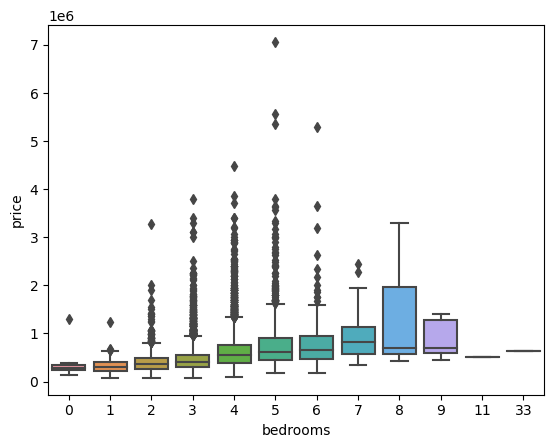

------------ VIEW ------------------


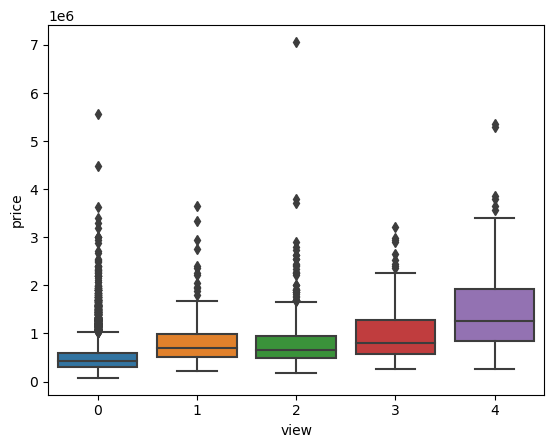

------------ CONDITION ------------------


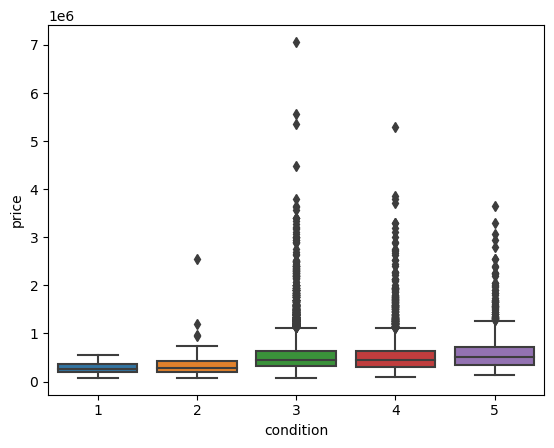

------------ GRADE ------------------


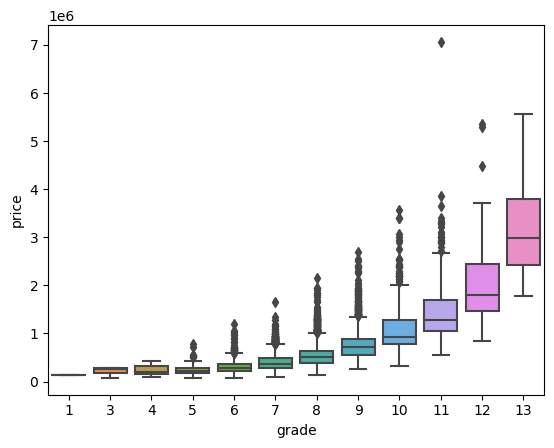

------------ WATERFRONT ------------------


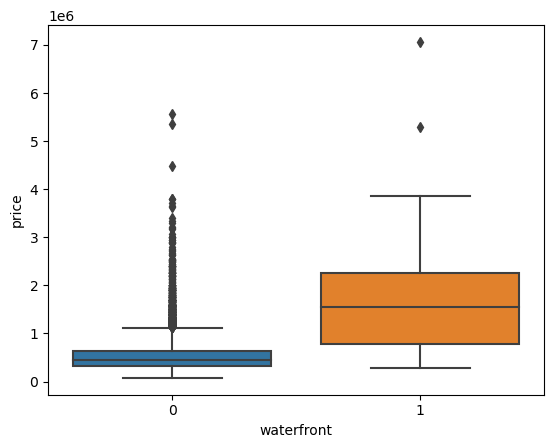

------------ ZIPCODE ------------------


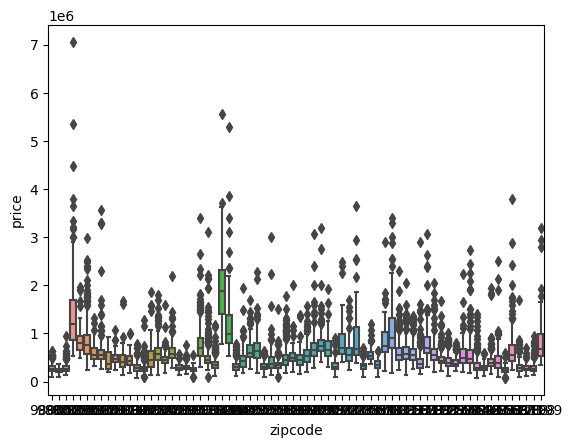

In [40]:
#box plot
for var in catgvars:
    print('------------',var.upper(),'------------------')
    sb.boxplot( x = var ,y = y_train , data = X_train )
    plt.show()

### Group By aggregate summary

In [41]:
#group by aggregate (summary)
X_train_temp = X_train
X_train_temp['price'] = y_train
for var in catgvars:
    print('------------',var.upper(),'------------------')
    print(X_train_temp['price'].groupby(X_train_temp[var]).describe())

------------ BEDROOMS ------------------
           count          mean            std       min       25%       50%  \
bedrooms                                                                      
0            8.0  3.957062e+05  370135.000890  142000.0  238750.0  276500.0   
1          114.0  3.218680e+05  161661.372578   75000.0  227512.5  294000.0   
2         1685.0  3.970301e+05  203365.544441   78000.0  266000.0  366000.0   
3         5911.0  4.659321e+05  264460.736420   82000.0  295000.0  410000.0   
4         4098.0  6.407670e+05  396480.695932  100000.0  381200.0  550000.0   
5          966.0  7.851066e+05  595483.337125  175000.0  440000.0  620000.0   
6          151.0  8.277589e+05  650903.537743  175000.0  463250.0  662500.0   
7           18.0  9.914532e+05  628033.373606  350000.0  567500.0  832000.0   
8            9.0  1.327222e+06  998139.241010  430000.0  575000.0  700000.0   
9            5.0  8.859998e+05  426004.862649  450000.0  599999.0  700000.0   
11         

### 1) Which varaible do you think are impacting the price of the house
1. Sqft living (price correlation coefficient with sqft_living : 0.7020350546118004)
2. grade (refer box plot)
3. No of bathrooms (price correlation coefficient with bathrooms : 0.5251375054139615)
4. Waterfront
5. Sqft living 15
6. Sqft above
7. Views number

### Outliers:
1. House with 33 rooms 

## Model Fitting

In [42]:
#first add the same features in X_valid df as well
adding_features(X_valid)

#Use the 
X_train_for_model = X_train[['sqft_living','grade','bathrooms','waterfront','sqft_living15','sqft_above','view','bedrooms']]
X_valid_for_model = X_valid[['sqft_living','grade','bathrooms','waterfront','sqft_living15','sqft_above','view','bedrooms']]


### Base model

In [43]:
reg_lin = LinearRegression()
reg_lin.fit(X_train_for_model , y_train)

y_pred = reg_lin.predict(X_valid_for_model)
mape = mean_absolute_percentage_error(y_pred,y_valid)
mse = mean_squared_error(y_pred,y_valid)
r2 = r2_score(y_pred,y_valid)
mae = mean_absolute_error(y_pred,y_valid)
print('mape:',mape,'mse:', mse,'r-square:',r2,'mae:',mae)
y_pred_training = reg_lin.predict(X_train_for_model)
print('training:: r2:', r2_score(y_pred_training,y_train),'mae:', mean_absolute_error(y_pred_training,y_train), 'mape:',mean_absolute_percentage_error(y_pred_training,y_train))
bm_r2 = r2_score(y_pred_training,y_train)
bm_training_mae = mean_absolute_error(y_pred_training,y_train)
bm_training_mape = mean_absolute_percentage_error(y_pred_training,y_train)
bm_valid_mae = mae
bm_valid_mape = mape

mape: 0.32370168419989664 mse: 48225959422.35638 r-square: 0.376353644415805 mae: 150509.9624535051
training:: r2: 0.3338489676366311 mae: 153289.71338497617 mape: 0.32465739098447516


### 1) Adding variable age

In [44]:
X_train_for_model = X_train[['sqft_living','grade','bathrooms','waterfront','sqft_living15','sqft_above','view','age','bedrooms']]
X_valid_for_model = X_valid[['sqft_living','grade','bathrooms','waterfront','sqft_living15','sqft_above','view','age','bedrooms']]

reg_lin = LinearRegression()
reg_lin.fit(X_train_for_model , y_train)

y_pred = reg_lin.predict(X_valid_for_model)
mape = mean_absolute_percentage_error(y_pred,y_valid)
mse = mean_squared_error(y_pred,y_valid)
r2 = r2_score(y_pred,y_valid)

mae = mean_absolute_error(y_pred,y_valid)
print('mape:',mape,'mse:', mse,'r-square:',r2,'mae:',mae)
y_pred_training = reg_lin.predict(X_train_for_model)
print('training:: r2:', r2_score(y_pred_training,y_train),'mae:', mean_absolute_error(y_pred_training,y_train), 'mape:',mean_absolute_percentage_error(y_pred_training,y_train))
age_r2 = r2_score(y_pred_training,y_train)
age_training_mae = mean_absolute_error(y_pred_training,y_train)
age_training_mape = mean_absolute_percentage_error(y_pred_training,y_train)
age_valid_mae = mae
age_valid_mape = mape

mape: 0.31732018813080537 mse: 41587760750.20244 r-square: 0.5102097861532775 mae: 138572.4471807095
training:: r2: 0.4692336411498681 mae: 140528.07249604404 mape: 0.32183154285690135


### Observation for 1 : Improvement in metrics. Mape 37 to 31 . MSE reduced. R2 .27 to .43.

### 2) Adding have_basement to the feature list

In [45]:
X_train_for_model = X_train[['sqft_living','grade','bathrooms','waterfront','sqft_living15','sqft_above','view','age','bedrooms','have_basement']]
X_valid_for_model = X_valid[['sqft_living','grade','bathrooms','waterfront','sqft_living15','sqft_above','view','age','bedrooms','have_basement']]

reg_lin = LinearRegression()
reg_lin.fit(X_train_for_model , y_train)

y_pred = reg_lin.predict(X_valid_for_model)
mape = mean_absolute_percentage_error(y_pred,y_valid)
mse = mean_squared_error(y_pred,y_valid)
r2 = r2_score(y_pred,y_valid)

mae = mean_absolute_error(y_pred,y_valid)
print('mape:',mape,'mse:', mse,'r-square:',r2,'mae:',mae)
y_pred_training = reg_lin.predict(X_train_for_model)
print('training:: r2:', r2_score(y_pred_training,y_train),'mae:', mean_absolute_error(y_pred_training,y_train), 'mape:',mean_absolute_percentage_error(y_pred_training,y_train))
basement_r2 = r2_score(y_pred_training,y_train)
basement_training_mae = mean_absolute_error(y_pred_training,y_train)
basement_training_mape = mean_absolute_percentage_error(y_pred_training,y_train)
basement_valid_mae = mae
basement_valid_mape = mape

mape: 0.31835485711441136 mse: 41584042349.35964 r-square: 0.5101636950276 mae: 138523.6029516603
training:: r2: 0.46932258085906164 mae: 140483.25107414738 mape: 0.3219337389166966


### Obsemrvation for 2: MAPE reduced to 29.

### 3) Data transformation y

In [46]:
#y-transformation

y_train_transformed = np.log10(y_train)

reg_lin = LinearRegression()
reg_lin.fit(X_train_for_model , y_train_transformed)

y_pred_transformed = reg_lin.predict(X_valid_for_model)
y_pred = 10**y_pred_transformed
mape = mean_absolute_percentage_error(y_pred,y_valid)
mse = mean_squared_error(y_pred,y_valid)
r2 = r2_score(y_pred,y_valid)

mae = mean_absolute_error(y_pred,y_valid)
print('mape:',mape,'mse:', mse,'r-square:',r2,'mae:',mae)


y_pred_training = reg_lin.predict(X_train_for_model)
print('training:: r2:', r2_score(10**y_pred_training,y_train),'mae:', mean_absolute_error(10**y_pred_training,y_train), 'mape:',mean_absolute_percentage_error(10**y_pred_training,y_train))
y_transform_r2 = r2_score(10**y_pred_training,y_train)
y_transform_r2_training_mae = mean_absolute_error(10**y_pred_training,y_train)
y_transform_r2_training_mape = mean_absolute_percentage_error(10**y_pred_training,y_train)
y_transform_r2_valid_mae = mae
y_transform_r2_valid_mape = mape

mape: 0.2567424058589652 mse: 40004335966.92595 r-square: 0.5980500449682162 mae: 132015.80708282805
training:: r2: 0.590163436470055 mae: 132702.25641277814 mape: 0.2546883968734339


### 4) Data transformation - Input

In [47]:
#transformming funtion
#'sqft_living','grade','bathrooms','waterfront','sqft_living15','sqft_above','view','age'
pd.options.mode.chained_assignment = None  # default='warn'

def transform_input(dfinp):
    dfinpcopy = dfinp
    #dfinpcopy['sqft_living'] = np.sqrt(dfinp['sqft_living'])
    #dfinpcopy['sqft_living15'] = np.sqrt(dfinp['sqft_living15'])
    #dfinpcopy['sqft_above'] = np.sqrt(dfinp['sqft_above'])
    dfinpcopy['grade'] = np.sqrt(dfinp['grade'])
    dfinpcopy['bathrooms'] = np.square(dfinp['bathrooms'])
    dfinpcopy['bedrooms'] = np.square(dfinp['bedrooms'])
    dfinpcopy['age'] = np.square(dfinp['age'])
    #dfinpcopy['view'] = np.square(dfinp['view'])
    #dfinpcopy['age'] = np.log10(dfinp['age'])
    return dfinpcopy


X_train_for_model = X_train[['sqft_living','grade','bathrooms','waterfront','sqft_living15','sqft_above','view','age','bedrooms','have_basement']]
X_valid_for_model = X_valid[['sqft_living','grade','bathrooms','waterfront','sqft_living15','sqft_above','view','age','bedrooms','have_basement']]

X_train_for_model_transformed = transform_input(X_train_for_model)
X_valid_for_model_transformed = transform_input(X_valid_for_model)

#y-transformation

y_train_transformed = np.log10(y_train)

reg_lin = LinearRegression()
reg_lin.fit(X_train_for_model , y_train_transformed)

y_pred_transformed = reg_lin.predict(X_valid_for_model)
y_pred = 10**y_pred_transformed
mape = mean_absolute_percentage_error(y_pred,y_valid)
mse = mean_squared_error(y_pred,y_valid)
r2 = r2_score(y_pred,y_valid)

mae = mean_absolute_error(y_pred,y_valid)
print('mape:',mape,'mse:', mse,'r-square:',r2,'mae:',mae)
y_pred_training = reg_lin.predict(X_train_for_model)
print('training:: r2:', r2_score(10**y_pred_training,y_train),'mae:', mean_absolute_error(10**y_pred_training,y_train), 'mape:',mean_absolute_percentage_error(10**y_pred_training,y_train))
input_transform_r2 = r2_score(10**y_pred_training,y_train)
input_transform_training_mae = mean_absolute_error(10**y_pred_training,y_train)
input_transform_training_mape = mean_absolute_percentage_error(10**y_pred_training,y_train)
input_transform_valid_mae = mae
input_transform_valid_mape = mape

mape: 0.2532887193891899 mse: 38542952768.23395 r-square: 0.6070500219081045 mae: 129631.9334634818
training:: r2: 0.5704384667612321 mae: 131445.25390329977 mape: 0.252717797584629


### 5) With zipcode dummy varaible

In [48]:
#transformming funtion
#'sqft_living','grade','bathrooms','waterfront','sqft_living15','sqft_above','view','age'
pd.options.mode.chained_assignment = None  # default='warn'

def transform_input(dfinp):
    dfinpcopy = dfinp
    dfinpcopy['sqft_living'] = np.log(dfinp['sqft_living'])
    dfinpcopy['sqft_living15'] = np.log(dfinp['sqft_living15'])
    #dfinpcopy['sqft_above'] = np.sqrt(dfinp['sqft_above'])
    #dfinpcopy['grade'] = np.sqrt(dfinp['grade'])
    dfinpcopy['bathrooms'] = np.square(dfinp['bathrooms'])
    dfinpcopy['bedrooms'] = np.square(dfinp['bedrooms'])
    dfinpcopy['age'] = np.square(dfinp['age'])
    #dfinpcopy['view'] = np.square(dfinp['view'])
    #dfinpcopy['age'] = np.log10(dfinp['age'])
    return dfinpcopy


X_train_for_model = X_train[['sqft_living','grade','bathrooms','waterfront','sqft_living15','sqft_above','view','age','bedrooms','have_basement','zipcode']]
X_valid_for_model = X_valid[['sqft_living','grade','bathrooms','waterfront','sqft_living15','sqft_above','view','age','bedrooms','have_basement','zipcode']]

X_train_for_model_transformed = transform_input(X_train_for_model)
X_valid_for_model_transformed = transform_input(X_valid_for_model)

X_train_for_model_transformed_withdummy = pd.get_dummies(X_train_for_model_transformed, columns=['zipcode'])
X_valid_for_model_transformed_withdummy = pd.get_dummies(X_valid_for_model_transformed, columns=['zipcode'])

#y-transformation

y_train_transformed = np.log10(y_train)

reg_lin = LinearRegression()
reg_lin.fit(X_train_for_model_transformed_withdummy , y_train_transformed)

y_pred_transformed = reg_lin.predict(X_valid_for_model_transformed_withdummy)
y_pred = 10**y_pred_transformed
mape = mean_absolute_percentage_error(y_pred,y_valid)
mse = mean_squared_error(y_pred,y_valid)
r2 = r2_score(y_pred,y_valid)

mae = mean_absolute_error(y_pred,y_valid)
print('mape:',mape,'mse:', mse,'r-square:',r2,'mae:',mae)
y_pred_training = reg_lin.predict(X_train_for_model_transformed_withdummy)
print('training:: r2:', r2_score(10**y_pred_training,y_train),'mae:', mean_absolute_error(10**y_pred_training,y_train), 'mape:',mean_absolute_percentage_error(10**y_pred_training,y_train))
dummy_transform_r2 = r2_score(10**y_pred_training,y_train)
dummy_transform_training_mae = mean_absolute_error(10**y_pred_training,y_train)
dummy_transform_training_mape = mean_absolute_percentage_error(10**y_pred_training,y_train)
dummy_transform_valid_mae = mae
dummy_transform_valid_mape = mape

mape: 0.13794270132769046 mse: 15694103232.928308 r-square: 0.846812710885318 mae: 74317.41370444658
training:: r2: 0.8561093877854774 mae: 74161.88941557505 mape: 0.13720619307263693


In [49]:
print('base model, age, have basement, y transform, input transform, zipcode dummying')
print('r2:\n',round(bm_r2,3),round( age_r2,3),round( basement_r2,3),round( y_transform_r2,3),round( input_transform_r2,3),round(dummy_transform_r2,3))
print('mae train:\n',round(bm_training_mae,3),round( age_training_mae,3),round( basement_training_mae,3),round( y_transform_r2_training_mae,3),round( input_transform_training_mae,3),round(dummy_transform_training_mae,3))
print('mape train:\n',round(bm_training_mape,3),round( age_training_mape,3),round( basement_training_mape,3),round( y_transform_r2_training_mape,3),round( input_transform_training_mape,3),round(dummy_transform_training_mape,3))
print('mae:\n',round(bm_valid_mae,3),round( age_valid_mae,3),round( basement_valid_mae,3),round( y_transform_r2_valid_mae,3),round( input_transform_valid_mae,3),round(dummy_transform_valid_mae,3))
print('mape:\n',round(bm_valid_mape,3),round( age_valid_mape,3),round( basement_valid_mape,3),round( y_transform_r2_valid_mape,3),round( input_transform_valid_mape,3),round(dummy_transform_valid_mape,3))

base model, age, have basement, y transform, input transform, zipcode dummying
r2:
 0.334 0.469 0.469 0.59 0.57 0.856
mae train:
 153289.713 140528.072 140483.251 132702.256 131445.254 74161.889
mape train:
 0.325 0.322 0.322 0.255 0.253 0.137
mae:
 150509.962 138572.447 138523.603 132015.807 129631.933 74317.414
mape:
 0.324 0.317 0.318 0.257 0.253 0.138


## Final testing on test data

In [50]:
adding_features(X_test)

X_test_for_model = X_test[['sqft_living','grade','bathrooms','waterfront','sqft_living15','sqft_above','view','age','bedrooms','have_basement','zipcode']]

X_test_for_model_transformed = transform_input(X_test_for_model)

X_test_for_model_transformed_withdummy = pd.get_dummies(X_test_for_model_transformed, columns=['zipcode'])

y_pred_transformed = reg_lin.predict(X_test_for_model_transformed_withdummy)
y_pred = 10**y_pred_transformed
mape = mean_absolute_percentage_error(y_pred,y_test)
mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)

mae = mean_absolute_error(y_pred,y_test)
print('mape:',mape,'mse:', mse,'r-square:',r2,'mae:',mae)

mape: 0.13989281889260688 mse: 17973298178.65049 r-square: 0.8610865290955932 mae: 75499.70558596762
